In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

In [2]:
arparams = np.array([.75, -.25])
print(arparams)
maparams = np.array([.65, .35])
print(maparams)

[ 0.75 -0.25]
[0.65 0.35]


### The conventions of the arma_generate function require that we specify a 1 for the zero-lag of the AR and MA parameters and that the AR parameters be negated.


In [3]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250

In [4]:
y = arma_generate_sample(arparams, maparams, nobs)
y

array([-0.20470766,  0.19235261, -0.08433185, -0.83707234,  0.81603103,
        3.29794896,  3.95609883,  2.9724152 ,  2.22496201,  2.77052827,
        3.60818553,  1.80821121,  0.23907621, -0.31876559,  1.29911403,
        2.89997171,  0.89826293, -1.41395225, -0.55827532,  0.4509334 ,
        0.23711597,  0.03775729,  3.33911364,  3.75242669,  1.87578678,
       -0.13968169, -0.39239613,  0.50453666,  0.92380839,  2.09446333,
        1.50015688, -0.22312188, -3.70260248, -6.41348649, -6.78429724,
       -4.1354646 , -2.60862928, -1.42958525, -1.84873351, -1.3456147 ,
       -3.06230205, -3.57697909, -4.41465384, -4.45961865, -4.71875755,
       -3.32714099, -1.20901549, -0.48295083, -0.0864054 ,  1.35715125,
        2.1026239 ,  2.00218384,  1.14891532,  1.44457802,  2.77237527,
        2.01323595, -0.86527519, -2.45874151, -1.39714146, -0.59299439,
        0.60320594,  0.92011469,  0.88467618,  1.13268897,  1.93445613,
        1.00080373, -0.07928155, -2.96372073, -4.36141368, -4.97

In [5]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
y.head()

1980-01-31   -0.204708
1980-02-29    0.192353
1980-03-31   -0.084332
1980-04-30   -0.837072
1980-05-31    0.816031
dtype: float64

In [6]:
y.tail()

2000-06-30    0.173211
2000-07-31   -0.048325
2000-08-31   -0.415804
2000-09-30    0.338725
2000-10-31    0.360838
dtype: float64

In [7]:
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_mod

/home/hemanth/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hemanth/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [8]:
arma_res = arma_mod.fit(trend='nc', disp=-1)
arma_res


In [9]:
arma_res.conf_int()

,0,1
ar.L1.y,0.526869,1.054015
ar.L2.y,-0.453324,-0.009488
ma.L1.y,0.452169,0.949289
ma.L2.y,0.220614,0.591546


In [10]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -353.445
Method:                       css-mle   S.D. of innovations              0.990
Date:                Mon, 14 Dec 2020   AIC                            716.891
Time:                        15:50:25   BIC                            734.498
Sample:                    01-31-1980   HQIC                           723.977
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7904      0.134      5.878      0.000       0.527       1.054
ar.L2.y       -0.2314      0.113     -2.044      0.041      -0.453      -0.009
ma.L1.y        0.7007      0.127      5.525      0.0

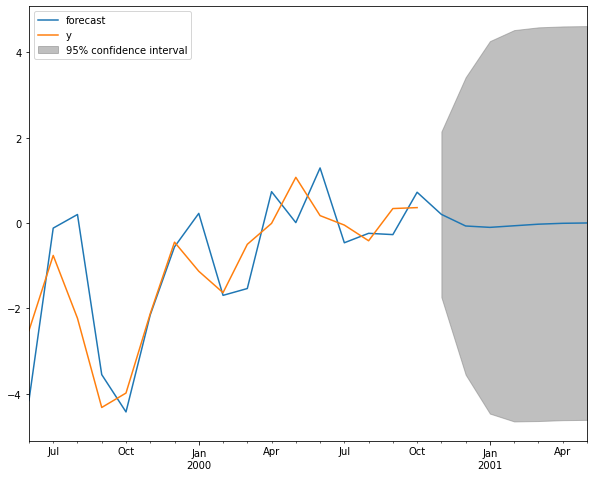

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start='1999-06-30', end='2001-05-31', ax=ax)

legend = ax.legend(loc='upper left')